In [1]:
library(soGGi)
library(profileplyr)
library(dplyr)
library(ggplot2)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package:

In [2]:
ctcf <- "../data/bonev/CTCF_mESC/GSE96107_ES_CTCF.bw"
phastcons <- "../data/conservation/mm10.60way.phastCons.bw"
atac <- "../data/atac/GSM2592676_Ctrl-1.bw"
rad21 <- "../data/rad21//GSM3563958_Rad21_ChIP_wt_rep1.bw"
maz <- "../data/MAZ/GSM5737248_MAZ_1G5_ESC.bw"

nc <- "4-NC_Loops/files/ncCBS.bed"
c <- "4-NC_Loops/files/canonicalCBS.bed" 

In [3]:
ctcfProfile_1500 <- BamBigwig_to_chipProfile(signalFiles = c(ctcf,
                                                             rad21,
                                                             atac,
                                                             maz,
                                                             phastcons),
                                             testRanges = c(nc,c),
                                             format="bigwig",
                                             style="point",
                                             bin_size=10,
                                             distanceAround=1500)
ctcfProfile_object_1500 <- as_profileplyr(ctcfProfile_1500)
rownames(sampleData(ctcfProfile_object_1500)) <- c("CTCF","Rad21","ATAC","MAZ","PhastCons")

Loading bigwig files.

Making ChIPprofile object from signal files.

Importing rlelist
..Done

Filtering regions which extend outside of genome boundaries...
..Done

Filtered 0 of 4731 regions

Splitting regions by Watson and Crick strand..
..Done

..Done

Found 2345 Watson strand regions

Found 2386 Crick strand regions

Extending regions..
...done

Calculating coverage across regions
Calculating per contig. 

contig: 1

contig: 2

contig: 3

contig: 4

contig: 5

contig: 6

contig: 7

contig: 8

contig: 9

contig: 10

contig: 11

contig: 12

contig: 13

contig: 14

contig: 15

contig: 16

contig: 17

contig: 18

contig: 19

contig: 20

Creating ChIPprofile.

Importing rlelist
..Done

Filtering regions which extend outside of genome boundaries...
..Done

Filtered 0 of 4731 regions

Splitting regions by Watson and Crick strand..
..Done

..Done

Found 2345 Watson strand regions

Found 2386 Crick strand regions

Extending regions..
...done

Calculating coverage across regions
Calculating

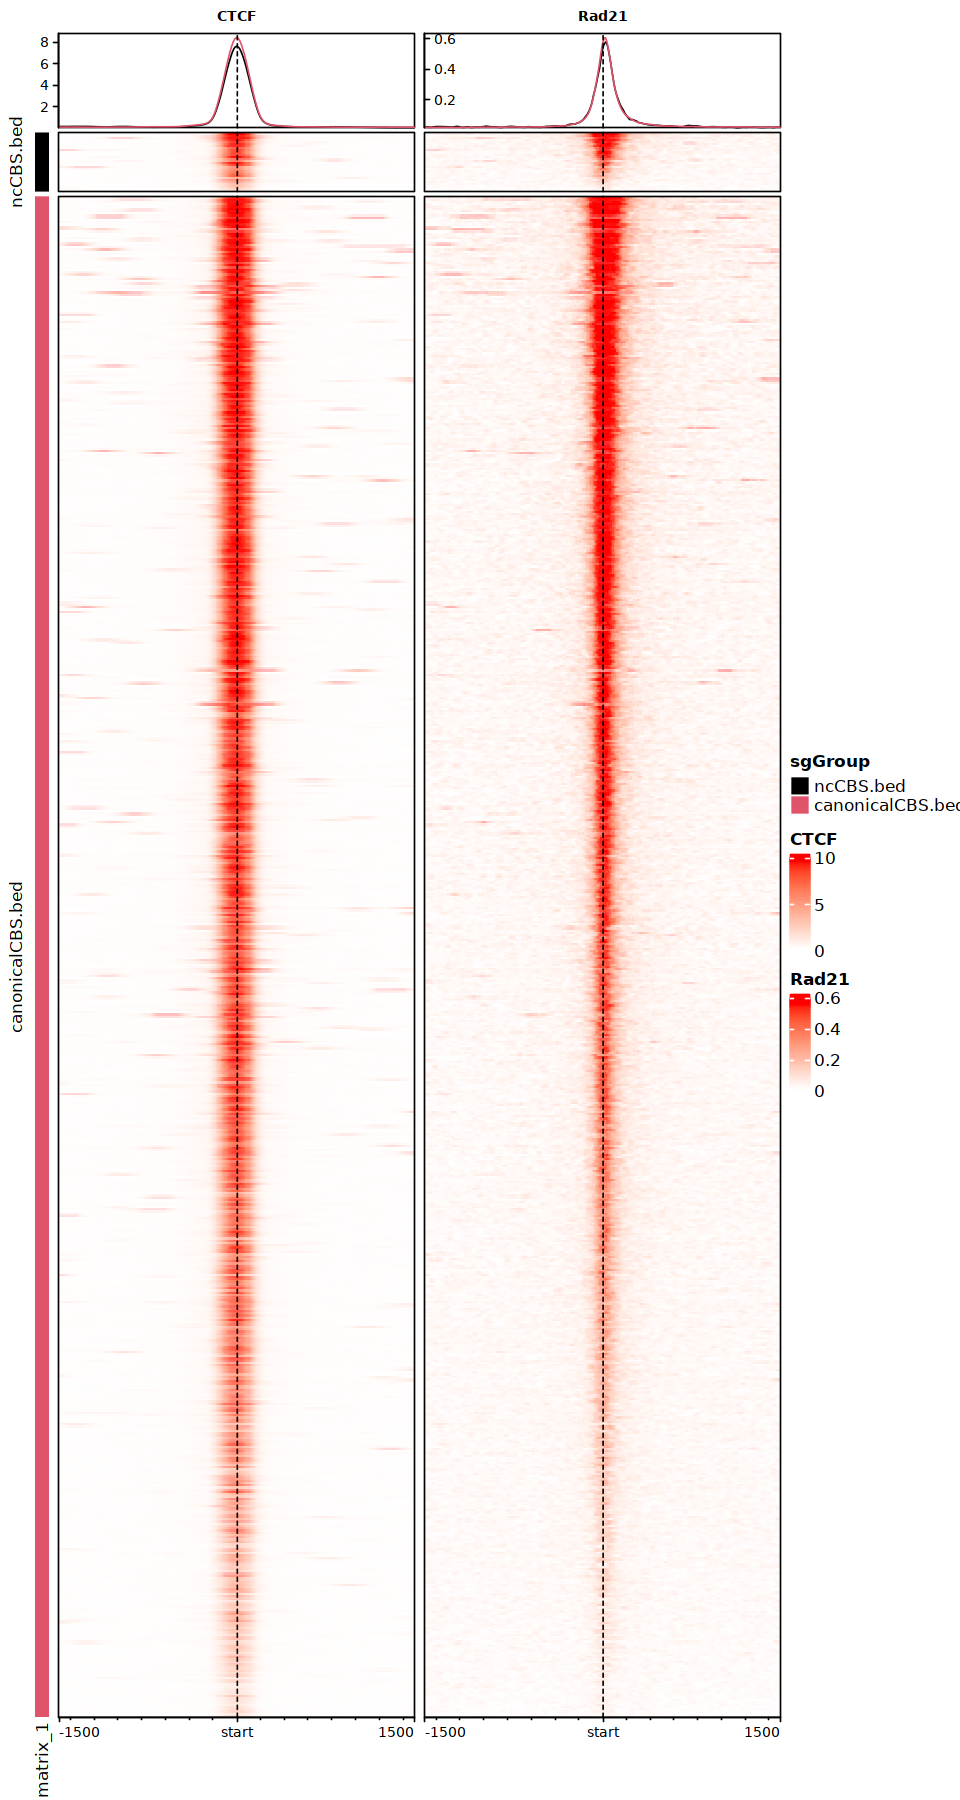

In [4]:
options(repr.plot.height=15,repr.plot.width=8)
#png("4-NC_Loops/plots/Heatmap_Rad21.png")
heatmap <- generateEnrichedHeatmap(ctcfProfile_object_1500[,,c("CTCF","Rad21")],
                                   all_color_scales_equal = FALSE,
                                   ylim=NULL,
                                   samples_to_sortby = "Rad21",
                                   decreasing=FALSE,
                                   matrices_pos_line=TRUE)
#dev.off()

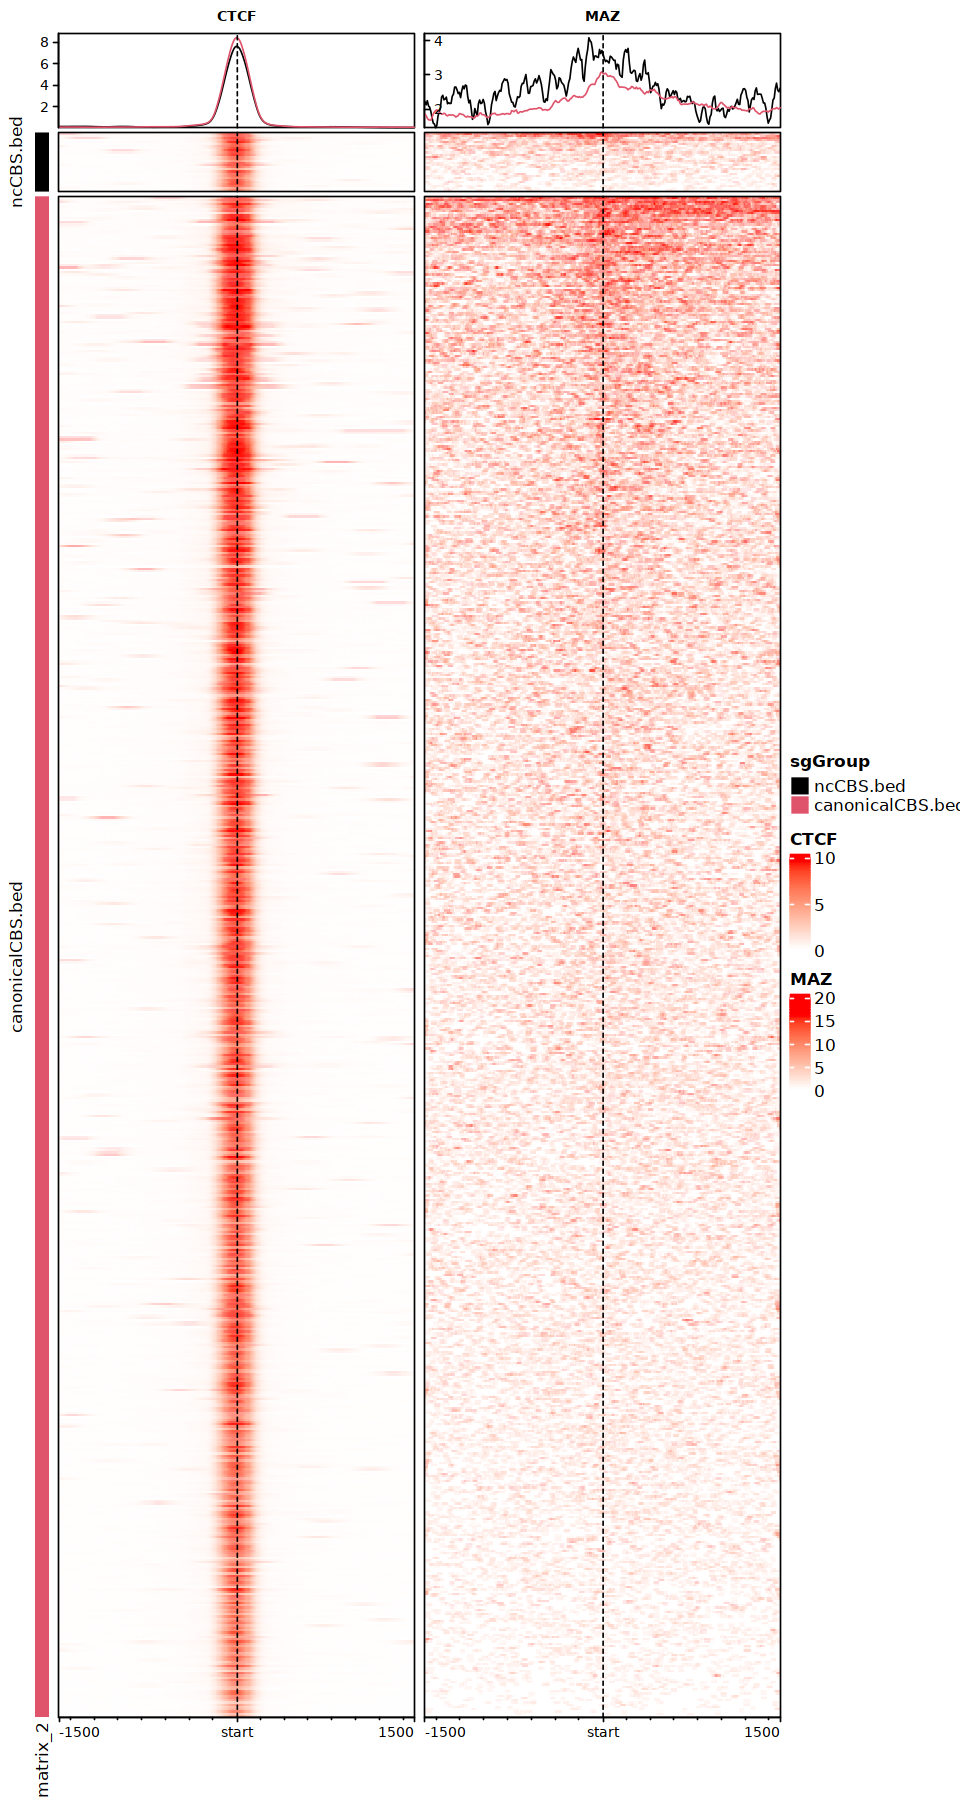

In [5]:
options(repr.plot.height=15,repr.plot.width=8)
#png("4-NC_Loops/plots/Heatmap_Maz.png")
heatmap <- generateEnrichedHeatmap(ctcfProfile_object_1500[,,c("CTCF","MAZ")],
                                   all_color_scales_equal = FALSE,
                                   ylim=NULL,
                                   samples_to_sortby = "MAZ",
                                   decreasing=FALSE,
                                   matrices_pos_line=TRUE)
#dev.off()

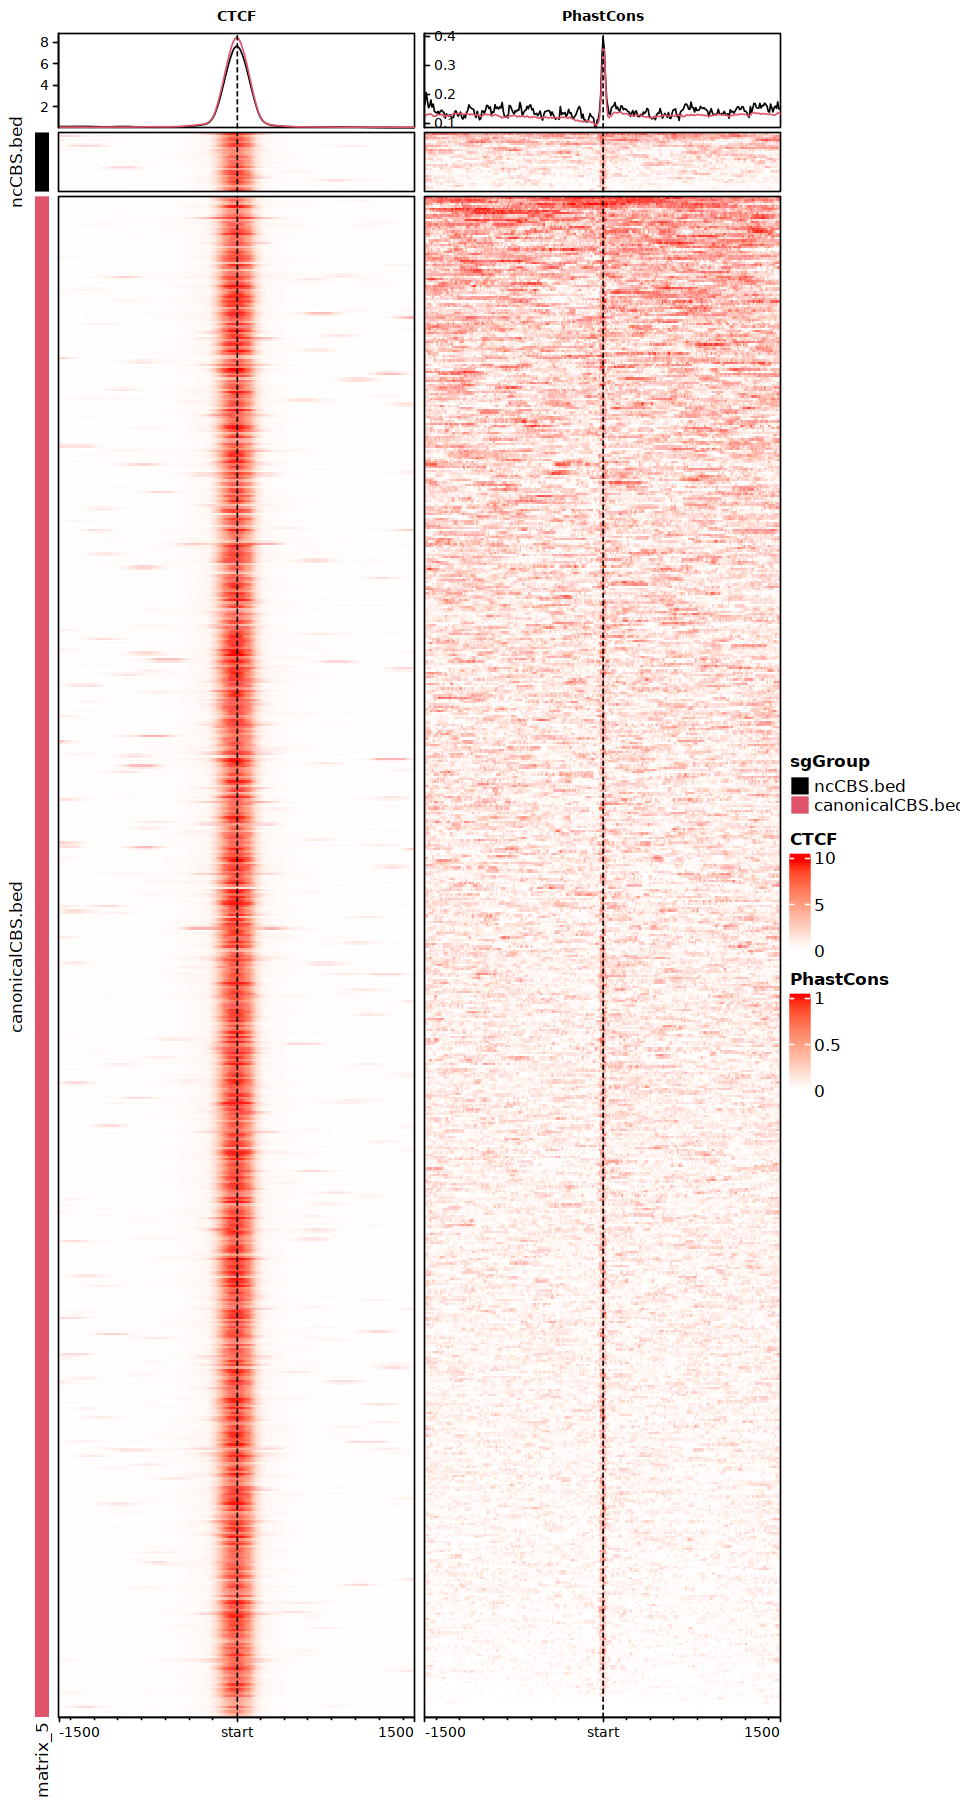

In [8]:
options(repr.plot.height=15,repr.plot.width=8)
#png("4-NC_Loops/plots/Heatmap_Conservation.png")
heatmap <- generateEnrichedHeatmap(ctcfProfile_object_1500[,,c("CTCF","PhastCons")],
                                   all_color_scales_equal = FALSE,
                                   ylim=NULL,
                                   samples_to_sortby = "PhastCons",
                                   decreasing=FALSE,
                                   matrices_pos_line=TRUE)
#dev.off()

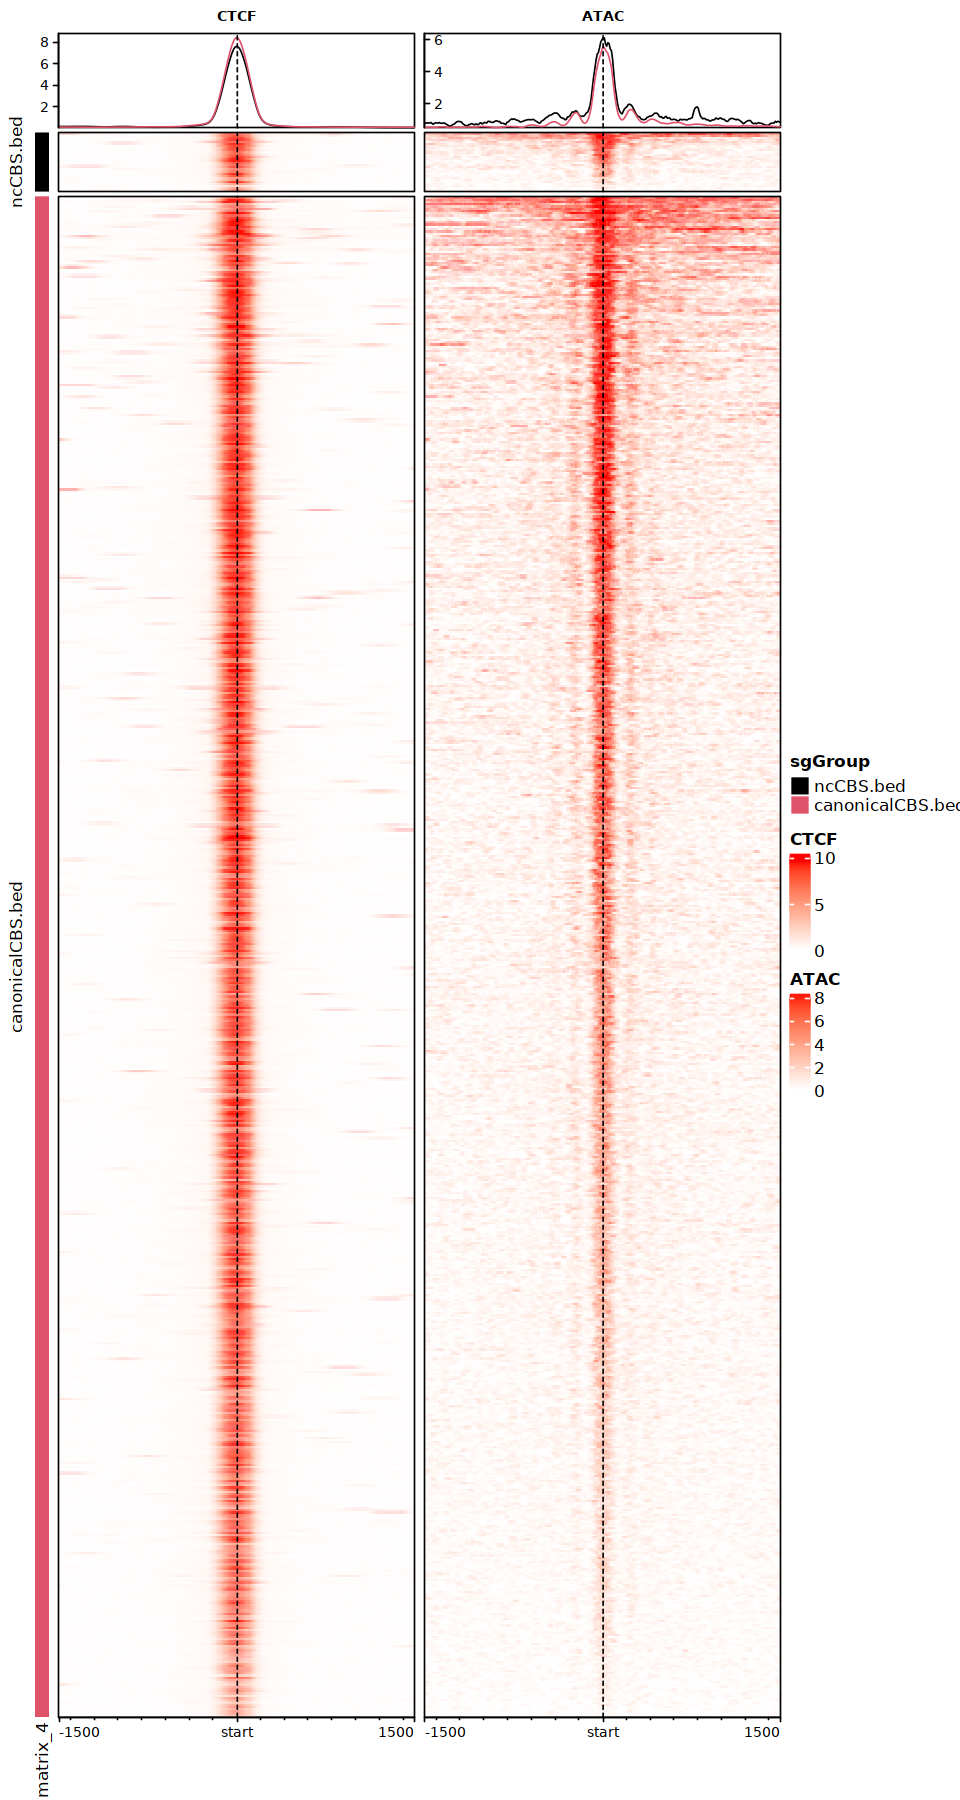

In [7]:
options(repr.plot.height=15,repr.plot.width=8)
#png("4-NC_Loops/plots/Heatmap_ATAC.png")
heatmap <- generateEnrichedHeatmap(ctcfProfile_object_1500[,,c("CTCF","ATAC")],
                                   all_color_scales_equal = FALSE,
                                   ylim=NULL,
                                   samples_to_sortby = "ATAC",
                                   decreasing=FALSE,
                                   matrices_pos_line=TRUE)
#dev.off()